In [8]:
import numpy as np
import random
import string

In [13]:
# Generate a fake big data file to test the idea

N = 100000
someText = [''.join(random.choice(string.ascii_uppercase) for _ in xrange(10)) 
                                                          for line in xrange(N)]
bigFile = zip(range(N), someText)

In [14]:
# The idea is that this file is too big to look at all at once, so we want to randomly sample
# in such a way that every line is equally likely to be in our sample.

# First create a resevoir with K lines in it
K = 100
resevoir = []

for line in bigFile:
    # The first K lines go into the resevoir
    if line[0] < K:
        resevoir.append(line)
    else:
        # Choose a random integer in the range from 0 to the current line index
        randInt = random.randint(0, line[0])
        # If the random integer is less than K, replace the line at resevoir index
        # randInt with the current line
        if randInt < K:
            resevoir[randInt] = line

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
# Here are the first ten... they look pretty random.
resevoir[:10]

[(67515, 'CSNTTBSHWI'),
 (42551, 'RLZIYUOOED'),
 (91542, 'HQSNHHFKCJ'),
 (15375, 'VOTHHWMRQC'),
 (89592, 'FTCQYUSWBX'),
 (99865, 'GZSUWGEGSB'),
 (23980, 'BSHLSWJYKS'),
 (18165, 'NHBUVZIISW'),
 (5067, 'WTIJVSQVFV'),
 (55532, 'FJSVZXTRHK')]

(array([ 12.,  10.,  10.,  11.,  10.,  12.,   8.,   8.,   8.,  11.]),
 array([  1.00000000e+01,   9.99550000e+03,   1.99810000e+04,
          2.99665000e+04,   3.99520000e+04,   4.99375000e+04,
          5.99230000e+04,   6.99085000e+04,   7.98940000e+04,
          8.98795000e+04,   9.98650000e+04]),
 <a list of 10 Patch objects>)

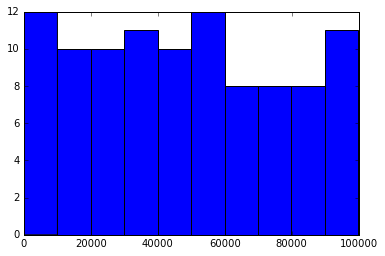

In [23]:
# A histogram plot should look mostly uniform

linesNums = [line[0] for line in resevoir]
plt.hist(linesNums)